# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/u/1/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

## 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．



In [1]:
FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt

--2021-06-09 07:06:41--  https://docs.google.com/uc?export=download&confirm=EXEa&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Resolving docs.google.com (docs.google.com)... 108.177.119.113, 108.177.119.102, 108.177.119.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-60-docs.googleusercontent.com/docs/securesc/50qlfantej86tda1cta8a9ao5o64mca7/4d0l4hv381po29v9loda6np341e846ca/1623222375000/06848720943842814915/04803963559680108497Z/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download [following]
--2021-06-09 07:06:42--  https://doc-04-60-docs.googleusercontent.com/docs/securesc/50qlfantej86tda1cta8a9ao5o64mca7/4d0l4hv381po29v9loda6np341e846ca/1623222375000/06848720943842814915/04803963559680108497Z/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download
Resolving doc-04-60-docs.googleusercontent.com (doc-04-60-docs.googleusercontent.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connecting to doc-04

In [2]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

In [3]:
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 62. 類似度の高い単語10件サイン類似度が高い10語と，その類似度を出力せよ．

In [6]:
#調べたい単語の類似度の高い単語を出力する
#類似度計算にはコサイン類似度を用いる
model.most_similar_cosmul('United_States', topn=10)

[('Unites_States', 0.8938615918159485),
 ('Untied_States', 0.8770676851272583),
 ('United_Sates', 0.8700354099273682),
 ('U.S.', 0.8655378818511963),
 ('theUnited_States', 0.8202189207077026),
 ('America', 0.8089197278022766),
 ('UnitedStates', 0.8083648085594177),
 ('Europe', 0.8066486716270447),
 ('countries', 0.8022394776344299),
 ('Canada', 0.8009527325630188)]

## 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [9]:
vector = model['Spain'] - model['Madrid']  + model['Athens']
model.most_similar_cosmul(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.9562304615974426),
 ('Aristeidis_Grigoriadis', 0.8694582581520081),
 ('Ioannis_Drymonakos', 0.8600285053253174),
 ('Ioannis_Christou', 0.8544448614120483),
 ('Greeks', 0.8521003127098083),
 ('Hrysopiyi_Devetzi', 0.8383888006210327),
 ('Panagiotis_Gionis', 0.8323913216590881),
 ('Heraklio', 0.8297829627990723),
 ('Lithuania', 0.8291547298431396),
 ('Periklis_Iakovakis', 0.8289119601249695)]

## 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [10]:
## 評価データダウンロード
!wget http://download.tensorflow.org/data/questions-words.txt

--2021-06-09 07:19:27--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.126.128, 2a00:1450:4013:c01::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.126.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.003s  

2021-06-09 07:19:27 (171 MB/s) - ‘questions-words.txt’ saved [603955/603955]



このデータは、(Athens-Greece, Tokyo-Japan)のように、意味的アナロジーを評価するための組と、(walk-walks, write-writes)のように文法的アナロジーを評価する組が含まれる．

In [14]:
!head questions-words.txt -n 5

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany


In [15]:
with open('./questions-words.txt', 'r') as f1, open('./questions-words-add.txt', 'w') as f2:
  ## f1から1行ずつ読込む
  for line in f1:
    line = line.split()
    if line[0] == ':':
      category = line[1]
    # 求めた単語と類似度を追加してf2に書込む
    else:
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      f2.write(' '.join([category] + line + [word, str(cos) + '\n']))

In [16]:
!head questions-words-add.txt -n 10

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878
capital-common-countries Athens Greece Beijing China China 0.7235777974128723
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622120857239
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414
capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527809739112854
capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824
capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
capital-common-countries Athens Greece Havana Cuba Cuba 0.6460992097854614
capital-common-countries Athens Greece Helsinki Finland Finland 0.6899983882904053


## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [18]:
with open('./questions-words-add.txt', 'r') as f2:
  sem_cnt = 0
  sem_ans = 0
  syn_cnt = 0
  syn_ans = 0
  for line in f2:
    line = line.split()
    if 'gram' in line[0]:
      syn_cnt += 1
      if line[4] == line[5]:
        syn_ans += 1
    else:
      sem_cnt += 1
      if line[4] == line[5]:
        sem_ans += 1


In [20]:
print('意味的アナロジーの正解率: {}'.format(sem_ans/sem_cnt))
print('文法的アナロジーの正解率: {}'.format(syn_ans/syn_cnt)) 

意味的アナロジーの正解率: 0.7308602999210734
文法的アナロジーの正解率: 0.7400468384074942


## 66. WordSimilarity-353での評価
[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [21]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2021-06-09 11:00:13--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.08s   

2021-06-09 11:00:13 (269 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [23]:
!head  './combined.csv' -n 10

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [24]:
similarity = []
with open('./combined.csv', 'r') as f:
  next(f) #ヘッダーをスキップ
  for line in f:
    line = [l.strip() for l in line.split(',')]
    line.append(model.similarity(line[0], line[1]))
    similarity.append(line)

In [28]:
 for i in range(10):
  print(similarity[i])

['love', 'sex', '6.77', 0.26393774]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]
['computer', 'internet', '7.58', 0.40686232]
['plane', 'car', '5.77', 0.37796983]
['train', 'car', '6.31', 0.34025612]
['telephone', 'communication', '7.50', 0.33218452]
['television', 'radio', '6.77', 0.6114971]


### スピアマンの相関係数とは？
以下のサイトから引用  
http://www.tamagaki.com/math/Statistics609.html  
https://www.study-channel.com/2015/08/spearmans-rank-correlation-coefficient.html

**スピアマンの順位相関係数**  
相関係数は２変量に直線的な相関関係があれば適用されるが、そうでない場合やデータの順位しか分かっていない場合もあります。そんなときに有効なのがスピアマンの順位相関係数です

**データの尺度や分布**  
正規分布に従っておらず、尺度水準が比率、間隔尺度、順序尺度のデータを用いることができます。同じ集団の（対応のある）2変数以上のデータである必要があります。正規分布を仮定しない検定なので、ノンパラメトリックな手法に含まれます。

**検定の指標**  
相関係数と、相関係数の有意性（ｐ値）を用います。相関係数の解釈は目安として以下のものがあります。| r | は相関係数の絶対値です。
- | r | = 1.0 〜 0.7：かなり強い相関がある
- | r | = 0.7 〜 0.4：強い相関がある
- | r | = 0.4 〜 0.2：やや相関がある
- | r | = 0.2 〜 0.0：ほぼ相関がない

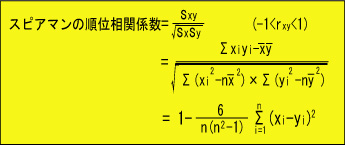

In [33]:
## scipy.stats.spearmanrを用いてスピアマン相関係数を計算する
import numpy as np
from scipy.stats import spearmanr


human = np.array(similarity).T[2]
word2vec = np.array(similarity).T[3]

correlation, pvalue = spearmanr(human, word2vec)
print('スピアマンの相関係数 = {}'.format(correlation))

スピアマンの相関係数 = 0.6849564489532377


したがって，Word2Vecと人間のword similarityの認識は強い相関があるといえる．

## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

単語アナロジーの評価データから国名を収集した．

In [34]:
countries = set()
with open('./questions-words-add.txt') as f:
  for line in f:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:
      countries.add(line[2])
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
countries = list(countries)

In [37]:
for i in range(3):
  print(countries)

['Thailand', 'Bulgaria', 'Denmark', 'Canada', 'Liberia', 'Angola', 'Afghanistan', 'Guinea', 'Argentina', 'Kazakhstan', 'Norway', 'Jordan', 'Estonia', 'Bhutan', 'Hungary', 'China', 'Iraq', 'Senegal', 'France', 'Malaysia', 'Uruguay', 'Greece', 'Bahamas', 'Turkmenistan', 'Romania', 'Portugal', 'Mauritania', 'Madagascar', 'Japan', 'Ukraine', 'Azerbaijan', 'Suriname', 'Korea', 'Mali', 'Morocco', 'Switzerland', 'Zambia', 'Finland', 'Ecuador', 'Serbia', 'Honduras', 'Cambodia', 'Armenia', 'Latvia', 'Guyana', 'Ireland', 'Tajikistan', 'Dominica', 'Somalia', 'Cyprus', 'Italy', 'Turkey', 'Bahrain', 'Uzbekistan', 'Israel', 'Sweden', 'Albania', 'Tunisia', 'England', 'Oman', 'Kenya', 'Austria', 'Indonesia', 'Jamaica', 'Spain', 'Malta', 'Venezuela', 'Mexico', 'Belarus', 'Montenegro', 'Cuba', 'Algeria', 'India', 'Macedonia', 'Nicaragua', 'Egypt', 'Burundi', 'Qatar', 'Chile', 'Malawi', 'Ghana', 'Croatia', 'Gambia', 'Peru', 'Rwanda', 'Georgia', 'Botswana', 'Eritrea', 'Zimbabwe', 'Fiji', 'Nigeria', 'Bangl

In [38]:
## 単語ベクトルを取得する
countries_vec = [model[country] for country in countries]

In [40]:
## sklearnのKMeansを利用する
from sklearn.cluster import KMeans

## k-means
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('クラスター：', i+1)
    print(', '.join([countries[k] for k in cluster]))

クラスター： 1
Denmark, Norway, Hungary, France, Greece, Romania, Portugal, Switzerland, Finland, Serbia, Ireland, Cyprus, Italy, Turkey, Sweden, Albania, England, Austria, Spain, Malta, Montenegro, Croatia, Iceland, Slovakia, Belgium, Netherlands, Slovenia, Poland, Liechtenstein, Europe, USA, Germany
クラスター： 2
Liberia, Angola, Guinea, Senegal, Mauritania, Madagascar, Mali, Zambia, Somalia, Tunisia, Kenya, Algeria, Burundi, Malawi, Ghana, Gambia, Rwanda, Botswana, Eritrea, Zimbabwe, Nigeria, Libya, Gabon, Niger, Mozambique, Sudan, Uganda, Namibia
クラスター： 3
Argentina, Uruguay, Bahamas, Suriname, Ecuador, Honduras, Guyana, Dominica, Jamaica, Venezuela, Mexico, Cuba, Nicaragua, Chile, Peru, Brazil, Colombia, Belize
クラスター： 4
Thailand, Canada, Afghanistan, Jordan, Bhutan, China, Iraq, Malaysia, Japan, Korea, Morocco, Cambodia, Bahrain, Israel, Oman, Indonesia, India, Egypt, Qatar, Fiji, Bangladesh, Vietnam, Lebanon, Nepal, Greenland, Pakistan, Australia, Philippines, Syria, Tuvalu, Taiwan, Samoa, L

## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

### Ward法とは？
以下のサイトから引用した  
https://www.albert2005.co.jp/knowledge/data_mining/cluster/hierarchical_clustering  
**ウォード法とは**  
2つのクラスターP,Qを結合したと仮定したとき、それにより移動したクラスターの重心とクラスター内の各サンプルとの距離の2乗和,$L(P∪Q)$と、元々の2つのクラスター内での重心とそれぞれのサンプルとの距離の2乗和,$L(P),L(Q)$の差  
$$Δ= L(P∪Q)－L(P)－L(Q)$$
が最小となるようなクラスター同士を結合する手法。  
$Δ$の値を情報ロス量という。  
→計算量は多いが分類感度がかなり良い。そのため、よく用いられる。

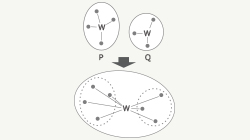

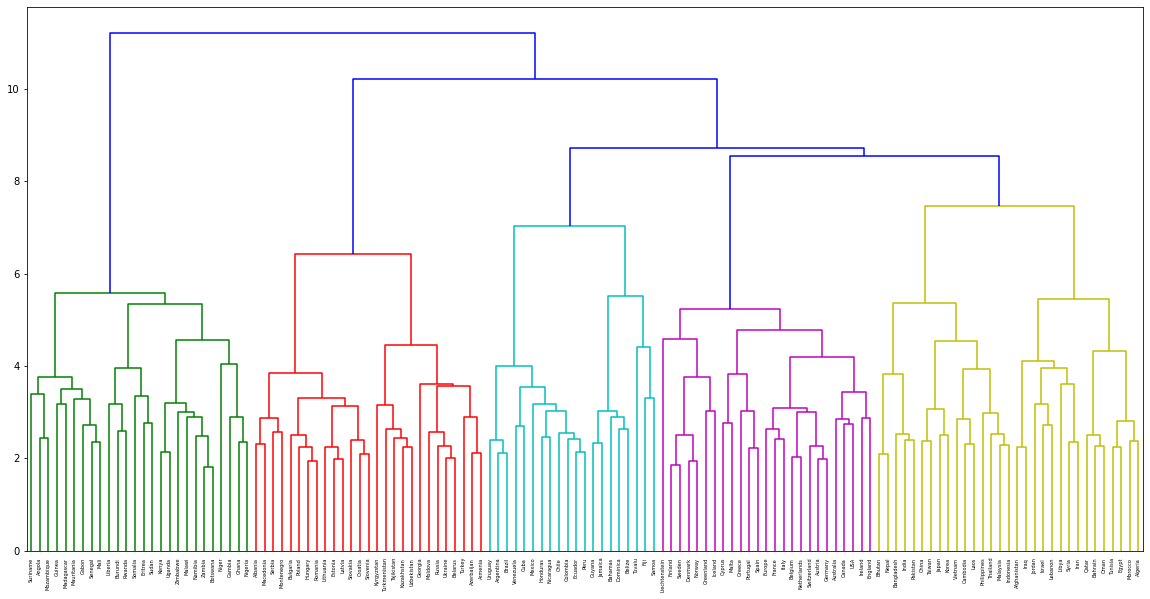

In [54]:
## scipyのdendrogramを用いて樹形図を描く
## linkageでクラスタリングする
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20, 10))
res = linkage(countries_vec, method='ward')
dendrogram(res, labels=countries)
plt.show()

## 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

### t-SNEとは？
以下のサイトから引用  
https://qiita.com/g-k/items/120f1cf85ff2ceae4aba

**t-SNEとは**  
t-SNEは高次元データを2次元や3次元に落とし込むための**次元削減アルゴリズム**です。  
次元削減といえば古典的なものとしてPCAやMDSがありますが、それら線形的な次元削減にはいくつかの問題点がありました。  


1．異なるデータを低次元上でも遠くに保つことに焦点を当てたアルゴリズムのため、類似しているデータを低次元上でも近くに保つことには弱い  
2．特に高次元上の非線形的なデータに対しては「類似しているデータを低次元上でも近くに保つこと」は不可能に近い  


これらの問題点を解決するためにデータの局所的な構造(類似しているデータを低次元上でも近くに保つこと)の維持を目的とした非線形次元削減技術が色々と生み出されました。t-SNEはその流れを汲んだアルゴリズムになります。  

**t-SNEの特徴**  
t-SNEのポイントを記載しています。具体的な処理の中身やメリットデメリットの理由は後述のアルゴリズムの説明のところで詳細に記載したいと思います。  

**処理のポイント**

- 高次元での距離分布が低次元での距離分布にもできるだけ合致するように変換する
- 距離の分布をスチューデンのt-分布に従うと仮定(SNEではガウス分布を仮定していたが、そこから改良された)

**メリット**  
- 高次元の局所的な構造を非常によく捉える
- 大局的な構造も可能な限り捉える

**デメリット**
- Perplexity(内部のパラメータ)を変えると全くことなるクラスターが出現してしまう

以下サイトを参考にbhtsneを使う  
https://esu-ko.hatenablog.com/entry/2020/08/31/Python%E3%81%A7tsne%E3%81%A7%E6%AC%A1%E5%85%83%E5%9C%A7%E7%B8%AE%E3%81%97%E3%81%9F%E3%81%84%28bhtsne%E3%82%92%E4%BD%BF%E3%81%86%29  
https://qiita.com/yamaru/items/822af1f7f77666381e20

In [63]:
!pip install bhtsne

     |████████████████████████████████| 92kB 5.2MB/s 
  Created wheel for bhtsne: filename=bhtsne-0.1.9-cp37-cp37m-linux_x86_64.whl size=214489 sha256=d7cb2a3ef3e6994ed9337873abdce9651ce5b5d89298510b147df1e1f40e1e6a
  Stored in directory: /root/.cache/pip/wheels/d3/11/da/b469506296148e4a04bb3bd5083052a2c5d44709851ed17c21
Successfully built bhtsne


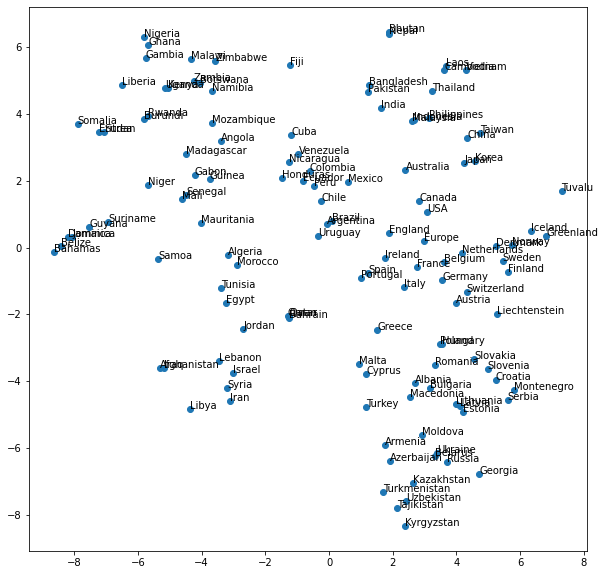

In [64]:
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123)
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()